In [3]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from config import seeds, N_tasks, B_tasks, plot_interv

sns.set(style="white", context="talk", font_scale=1.2, palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.figsize'] = (8, 6)

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
matplotlib.rcParams['mathtext.fontset'] = 'cm'
from matplotlib.ticker import FuncFormatter

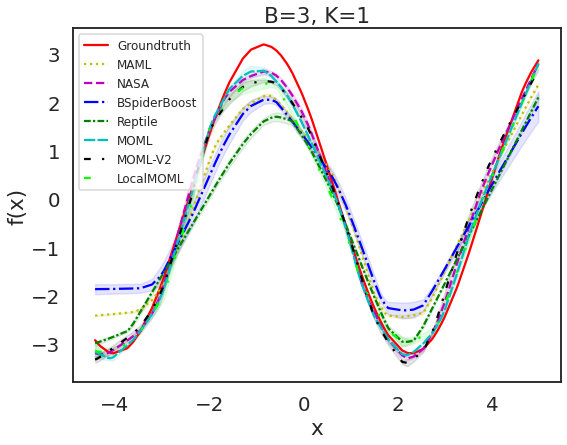

In [18]:
algorithms = ['MAML', 'NASA', 'BSpiderBoost', 'Reptile', 'MOML', 'MOML-V2', 'LocalMOML']
selected_task = 0      # show the plot of 1 test task
plt.figure(0).clf()
colors = ['r', 'y', 'm', 'b', 'g', 'c', 'k', 'lime']
markers = ['D', 'o', 'x', '*', 'v', '.', '^', '2']
linestyles = ['-', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (3, 10, 1, 10, 1, 10))]
for alg_idx, alg in enumerate(algorithms):
    all_predicted = []
    all_meta_data = []
    selected_te_loss = []
    for seed in seeds:
        file_name = './results/{}_{}_{}_curves.npz'.format(seed, alg, 1)
        meta_data = np.load(file_name)
        all_meta_data.append(meta_data)
        all_predicted.append(meta_data['predicted'][selected_task])
        selected_te_loss.append(meta_data['te_loss'][selected_task])
    selected_gt_x = all_meta_data[0]['gt_x'][selected_task]
    selected_gt_y = all_meta_data[0]['gt_y'][selected_task]
    if alg_idx == 0:
        plt.plot(selected_gt_x, selected_gt_y, label='Groundtruth', color=colors[0])
    plt.plot(selected_gt_x, np.squeeze(np.average(all_predicted, axis=0)), label=alg, color=colors[alg_idx+1], linestyle=linestyles[alg_idx+1])
    plt.fill_between(selected_gt_x, np.squeeze(np.average(all_predicted, axis=0)) + np.squeeze(np.std(all_predicted, axis=0)), np.squeeze(np.average(all_predicted, axis=0)) - np.squeeze(np.std(all_predicted, axis=0)), alpha=0.1,
                 color=colors[alg_idx+1])

plt.tight_layout()
plt.legend(prop={'size': 12})
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('B={0}, K={1}'.format(B_tasks, 1))
plt.savefig('./figures/task_' + str(selected_task) + '-' + str(B_tasks) + '-' + str(N_tasks) + '_tasks_' + str(1) + '_shots_sinwave.pdf',
                dpi=300,
                bbox_inches='tight')

<Figure size 576x432 with 0 Axes>

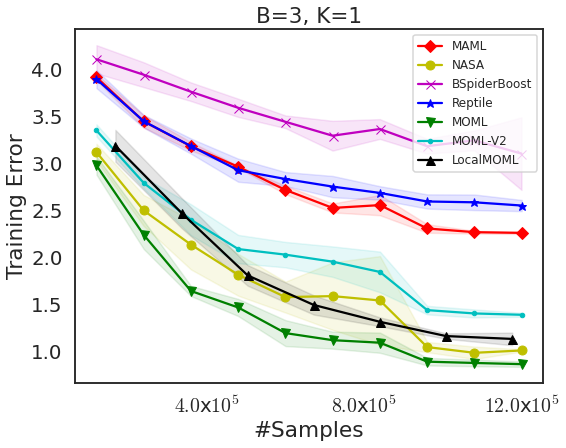

In [13]:
algorithms = ['MAML', 'NASA', 'BSpiderBoost', 'Reptile', 'MOML', 'MOML-V2', 'LocalMOML']
plt.figure(1).clf()
f1, ax1 = plt.subplots()
vis_time = 10
colors = ['r', 'y', 'm', 'b', 'g', 'c', 'k', 'lime']
markers = ['D', 'o', 'x', '*', 'v', '.', '^', '2']
linestyles = ['-', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (3, 10, 1, 10, 1, 10))]
for alg_idx, alg in enumerate(algorithms):
    file_name = './results/{}_{}_traces.npz'.format(alg, 1)
    meta_data = np.load(file_name)
    avg_tr_loss = meta_data['avg_tr_loss']
    std_tr_loss = meta_data['std_tr_loss']

    plt.plot(np.array(meta_data['avg_tr_samples']), avg_tr_loss,
            markevery=max(1, len(avg_tr_loss) // vis_time),
             marker=markers[alg_idx], label=alg, color=colors[alg_idx])
    tr_loss_upper = avg_tr_loss + std_tr_loss
    tr_loss_lower = avg_tr_loss - std_tr_loss
    plt.fill_between(np.array(meta_data['avg_tr_samples']), tr_loss_upper, tr_loss_lower, alpha=0.1,
                 color=colors[alg_idx])

def formatnum(x, pos):
    return '$%.1f$x$10^{5}$' % (x / 10000)

plt.tight_layout()
plt.legend(loc='upper right', prop={'size': 12})
plt.title('B={0}, K={1}'.format(str(B_tasks), 1))
formatter = FuncFormatter(formatnum)
ax1.xaxis.set_major_formatter(formatter)
new_ticks = ax1.get_xticks()[::2]
ax1.set_xticks(new_ticks[1:])
plt.ylabel('Training Error')
plt.ticklabel_format(axis='x')
plt.xlabel('#Samples')
plt.savefig('./figures/' + str(B_tasks) + '-' + str(N_tasks) + '_tasks_' + str(1) + '_shots.pdf', dpi=300, bbox_inches='tight')

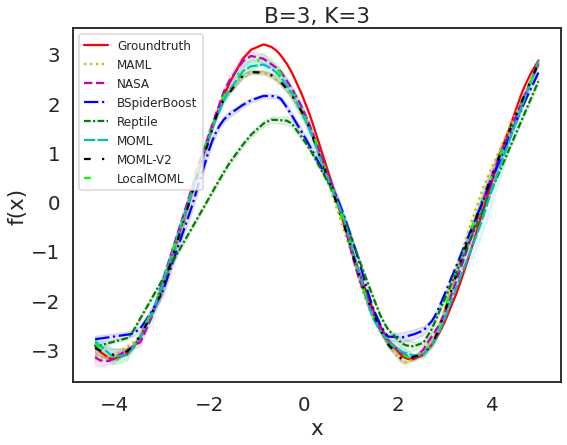

In [23]:
algorithms = ['MAML', 'NASA', 'BSpiderBoost', 'Reptile', 'MOML', 'MOML-V2', 'LocalMOML']
selected_task = 0      # show the plot of 1 test task
plt.figure(2).clf()
colors = ['r', 'y', 'm', 'b', 'g', 'c', 'k', 'lime']
markers = ['D', 'o', 'x', '*', 'v', '.', '^', '2']
linestyles = ['-', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (3, 10, 1, 10, 1, 10))]
for alg_idx, alg in enumerate(algorithms):
    all_predicted = []
    all_meta_data = []
    selected_te_loss = []
    for seed in seeds:
        file_name = './results/{}_{}_{}_curves.npz'.format(seed, alg, 3)
        meta_data = np.load(file_name)
        all_meta_data.append(meta_data)
        all_predicted.append(meta_data['predicted'][selected_task])
        selected_te_loss.append(meta_data['te_loss'][selected_task])
    selected_gt_x = all_meta_data[0]['gt_x'][selected_task]
    selected_gt_y = all_meta_data[0]['gt_y'][selected_task]
    if alg_idx == 0:
        plt.plot(selected_gt_x, selected_gt_y, label='Groundtruth', color=colors[0])
    plt.plot(selected_gt_x, np.squeeze(np.average(all_predicted, axis=0)), label=alg, color=colors[alg_idx+1], linestyle=linestyles[alg_idx+1])
    plt.fill_between(selected_gt_x, np.squeeze(np.average(all_predicted, axis=0)) + np.squeeze(np.std(all_predicted, axis=0)), np.squeeze(np.average(all_predicted, axis=0)) - np.squeeze(np.std(all_predicted, axis=0)), alpha=0.1,
                 color=colors[alg_idx+1])

plt.tight_layout()
plt.legend(prop={'size': 12})
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('B={0}, K={1}'.format(B_tasks, 3))
plt.savefig('./figures/task_' + str(selected_task) + '-' + str(B_tasks) + '-' + str(N_tasks) + '_tasks_' + str(3) + '_shots_sinwave.pdf',
                dpi=300,
                bbox_inches='tight')

<Figure size 576x432 with 0 Axes>

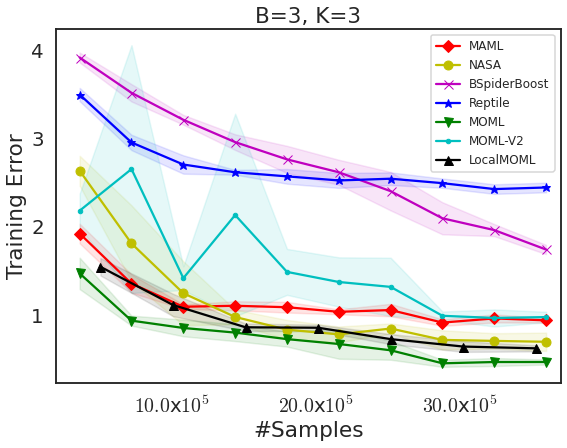

In [24]:
algorithms = ['MAML', 'NASA', 'BSpiderBoost', 'Reptile', 'MOML', 'MOML-V2', 'LocalMOML']
plt.figure(3).clf()
f1, ax1 = plt.subplots()
vis_time = 10
colors = ['r', 'y', 'm', 'b', 'g', 'c', 'k', 'lime']
markers = ['D', 'o', 'x', '*', 'v', '.', '^', '2']
linestyles = ['-', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (3, 10, 1, 10, 1, 10))]
for alg_idx, alg in enumerate(algorithms):
    file_name = './results/{}_{}_traces.npz'.format(alg, 3)
    meta_data = np.load(file_name)
    avg_tr_loss = meta_data['avg_tr_loss']
    std_tr_loss = meta_data['std_tr_loss']

    plt.plot(np.array(meta_data['avg_tr_samples']), avg_tr_loss,
            markevery=max(1, len(avg_tr_loss) // vis_time),
             marker=markers[alg_idx], label=alg, color=colors[alg_idx])
    tr_loss_upper = avg_tr_loss + std_tr_loss
    tr_loss_lower = avg_tr_loss - std_tr_loss
    plt.fill_between(np.array(meta_data['avg_tr_samples']), tr_loss_upper, tr_loss_lower, alpha=0.1,
                 color=colors[alg_idx])

def formatnum(x, pos):
    return '$%.1f$x$10^{5}$' % (x / 10000)

plt.tight_layout()
plt.legend(prop={'size': 12})
plt.title('B={0}, K={1}'.format(str(B_tasks), 3))
formatter = FuncFormatter(formatnum)
ax1.xaxis.set_major_formatter(formatter)
new_ticks = ax1.get_xticks()[::2]
ax1.set_xticks(new_ticks[1:])
plt.ylabel('Training Error')
plt.ticklabel_format(axis='x')
plt.xlim(right=370000)
plt.xlabel('#Samples')
plt.savefig('./figures/' + str(B_tasks) + '-' + str(N_tasks) + '_tasks_' + str(3) + '_shots.pdf', dpi=300, bbox_inches='tight')